In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic' #->한글 안깨지게

In [ ]:
#구별 인구수 소득수준, 구별 동백전 사용금액
#구별로 나눠서 시각화.
#되면 점수로도?

In [ ]:
path = "C:/Users/ekgus/Desktop/카드소비/"

In [3]:
june = pd.read_csv("june.csv",encoding = 'cp949',low_memory =False)

In [4]:
july = pd.read_csv("july.csv", encoding = 'cp949', low_memory =False)

In [5]:
august = pd.read_csv("august.csv", encoding = 'cp949', low_memory = False)

In [6]:
df = pd.concat([june, july,august], ignore_index=True)
df

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000
27135156,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600
27135157,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500
27135158,20220801,0,부산광역시,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600


In [7]:
df = df.rename(columns = {'strd_date':'기준일자', 'strd_tizn_val':'기준시간대값', 'ctpr_nm':'시도명', 'ccg_nm':'시군구명', 'adn_dgnm':'행정동명',
       'adng_no':'행정동번호', 'cardc_nm':'카드사명', 'tpbuz_cd':'업종코드', 'tpbuz_nm':'업종명', 'bth_yr':'출생년도', 'sex_cd':'성별코드',
       'trns_cnt':'거래건수', 'ttl_trns_amt':'총거래금액'})

In [8]:
code=pd.read_csv("업종코드_중분류.csv")

In [9]:
code

,중분류,업종코드
0,백화점/할인점,4001
1,백화점/할인점,4002
2,백화점/할인점,4004
3,백화점/할인점,4111
4,편의점/마켓,4010
...,...,...
326,편의점/마켓,8303
327,의류/패션잡화,4209
328,교육,5106
329,기타,5003


In [10]:
df=pd.merge(df,code, left_on='업종코드', right_on='업종코드', how='left')

In [11]:
df

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,중분류
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350,편의점/마켓
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700,편의점/마켓
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500,편의점/마켓
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700,편의점/마켓
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900,편의점/마켓
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000,편의점/마켓
27135156,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600,기타
27135157,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500,생활
27135158,20220801,0,부산광역시,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600,편의점/마켓


In [12]:
#데이터 전체가 부산광역시 이므로 제거
df=df.drop(['시도명'], axis=1)

In [13]:
df.drop(df[df['출생년도']==4607].index ,inplace=True, axis = 0)
df.drop(df[df['출생년도']==3688].index ,inplace=True, axis = 0)

In [14]:
#나이변수 생성
df['age']=2022-df['출생년도']+1

In [16]:
df['age_range'] = df['age']//10*10

In [17]:
#strd_date type변환
df=df.astype({'기준일자' : str})

In [18]:
df['기준일자']=pd.to_datetime(df['기준일자'])

In [19]:
from datetime import datetime
df['기준일자']

0          2022-06-01
1          2022-06-01
2          2022-06-01
3          2022-06-01
4          2022-06-01
              ...    
27135155   2022-08-01
27135156   2022-08-01
27135157   2022-08-01
27135158   2022-08-01
27135159   2022-08-01
Name: 기준일자, Length: 27135019, dtype: datetime64[ns]

In [20]:
#day_name(요일) 생성
df['요일']=df['기준일자'].dt.day_name()
df

,기준일자,기준시간대값,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,중분류,age,age_range,요일
0,2022-06-01,0,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350,편의점/마켓,50,50,Wednesday
1,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700,편의점/마켓,42,40,Wednesday
2,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500,편의점/마켓,31,30,Wednesday
3,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700,편의점/마켓,28,20,Wednesday
4,2022-06-01,0,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900,편의점/마켓,47,40,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000,편의점/마켓,65,60,Monday
27135156,2022-08-01,0,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600,기타,25,20,Monday
27135157,2022-08-01,0,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500,생활,25,20,Monday
27135158,2022-08-01,0,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600,편의점/마켓,52,50,Monday


In [22]:
df['건별거래금액'] = df['총거래금액']/df['거래건수']
len(df)

27135019

In [23]:
df

,기준일자,기준시간대값,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,중분류,age,age_range,요일,건별거래금액
0,2022-06-01,0,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350,편의점/마켓,50,50,Wednesday,7350.0
1,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700,편의점/마켓,42,40,Wednesday,3700.0
2,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500,편의점/마켓,31,30,Wednesday,7500.0
3,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700,편의점/마켓,28,20,Wednesday,2700.0
4,2022-06-01,0,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900,편의점/마켓,47,40,Wednesday,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000,편의점/마켓,65,60,Monday,30000.0
27135156,2022-08-01,0,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600,기타,25,20,Monday,59600.0
27135157,2022-08-01,0,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500,생활,25,20,Monday,7500.0
27135158,2022-08-01,0,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600,편의점/마켓,52,50,Monday,3800.0


In [25]:
len(df[df['건별거래금액'] < 10])

111

In [26]:
df.drop(df[(df['건별거래금액'] < 10)].index, inplace=True)
len(df)

27134908

In [27]:
#df.to_csv("data_all.csv", index = False)

In [28]:
df=df.drop(['행정동번호'], axis=1)
df=df.drop(['업종명'], axis=1)
df=df.drop(['업종코드'], axis=1)
df=df.drop(['age'], axis=1)
df=df.drop(['출생년도'], axis=1)

In [29]:
df

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액
0,2022-06-01,0,중구,대청동,코나,M,1,7350,편의점/마켓,50,Wednesday,7350.0
1,2022-06-01,0,중구,중앙동,부산,F,1,3700,편의점/마켓,40,Wednesday,3700.0
2,2022-06-01,0,중구,중앙동,부산,M,1,7500,편의점/마켓,30,Wednesday,7500.0
3,2022-06-01,0,중구,중앙동,부산,M,1,2700,편의점/마켓,20,Wednesday,2700.0
4,2022-06-01,0,중구,중앙동,코나,M,1,13900,편의점/마켓,40,Wednesday,13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,영도구,동삼1동,코나,M,1,30000,편의점/마켓,60,Monday,30000.0
27135156,2022-08-01,0,영도구,동삼1동,코나,M,1,59600,기타,20,Monday,59600.0
27135157,2022-08-01,0,영도구,동삼1동,코나,F,1,7500,생활,20,Monday,7500.0
27135158,2022-08-01,0,영도구,동삼1동,하나,F,2,7600,편의점/마켓,50,Monday,3800.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27134908 entries, 0 to 27135159
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준일자       datetime64[ns]
 1   기준시간대값     int64         
 2   시군구명       object        
 3   행정동명       object        
 4   카드사명       object        
 5   성별코드       object        
 6   거래건수       int64         
 7   총거래금액      int64         
 8   중분류        object        
 9   age_range  int64         
 10  요일         object        
 11  건별거래금액     float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 2.6+ GB


In [14]:
#df=df.astype({'기준시간대값' : str,'age_range' : str})

In [32]:
#df.to_csv("df_dr.csv", index = False)

In [4]:
# 데이터 불러오기
df= pd.read_csv("df_dr.csv")
df.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액
0,2022-06-01,0,중구,대청동,코나,M,1,7350,편의점/마켓,50,Wednesday,7350.0
1,2022-06-01,0,중구,중앙동,부산,F,1,3700,편의점/마켓,40,Wednesday,3700.0
2,2022-06-01,0,중구,중앙동,부산,M,1,7500,편의점/마켓,30,Wednesday,7500.0
3,2022-06-01,0,중구,중앙동,부산,M,1,2700,편의점/마켓,20,Wednesday,2700.0
4,2022-06-01,0,중구,중앙동,코나,M,1,13900,편의점/마켓,40,Wednesday,13900.0


In [6]:
import pandas as pd

# '기준일자' 열을 datetime 자료형으로 변환
df['기준일자'] = pd.to_datetime(df['기준일자'])

# '기준일자' 열에서 월을 추출하여 새로운 열 '월' 추가
df['월'] = df['기준일자'].dt.month

In [7]:
df_grouped = df.groupby(['월', '요일'])['거래건수'].sum().reset_index()

# 결과 출력
print(df_grouped)

    월         요일     거래건수
0   6     Monday  1426659
1   6    Tuesday  1440922
2   6  Wednesday  1878287
3   6   Thursday  1888161
4   6     Friday  1689303
5   6   Saturday  1692614
6   6     Sunday  1208701
7   7     Monday  1346246
8   7    Tuesday  1446426
9   7  Wednesday  1435463
10  7   Thursday  1408824
11  7     Friday  1881674
12  7   Saturday  1862979
13  7     Sunday  1390600
14  8     Monday  1286095
15  8    Tuesday  1255464
16  8  Wednesday  1279824
17  8   Thursday  1098757
18  8     Friday  1166188
19  8   Saturday  1043507
20  8     Sunday   799936


In [23]:
spend_of_month_and_day = df.groupby(['월', '요일'])['총거래금액'].agg(**{'월별요일별거래총액':'sum'})
spend_of_month_and_day

월별요일별거래총액
월 요일                    
6 Monday     27434760547
  Tuesday    29239746542
  Wednesday  38387045550
  Thursday   39255872042
  Friday     36325409025
  Saturday   37348948752
  Sunday     23623771785
7 Monday     28830269593
  Tuesday    30280999255
  Wednesday  29399374410
  Thursday   28778815289
  Friday     41987617851
  Saturday   42689788089
  Sunday     28066964390
8 Monday     23395943842
  Tuesday    22768206999
  Wednesday  23304801932
  Thursday   20011454374
  Friday     21577459516
  Saturday   20326098116
  Sunday     14025666804

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['요일'] = pd.Categorical(df['요일'], categories=weekday_order, ordered=True)

df['기준일자'] = pd.to_datetime(df['기준일자'])

# 월별 요일별 거래건수 집계
df_grouped = df.groupby(['월', '요일'])['거래건수'].sum().reset_index()


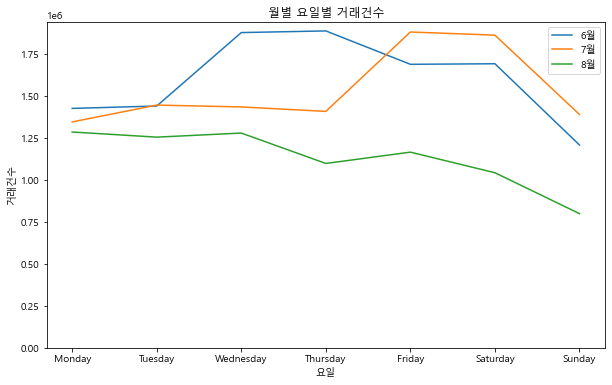

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(df_grouped['월'].unique()):
    data = df_grouped[df_grouped['월'] == month]
    ax.plot(data['요일'], data['거래건수'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('거래건수')
ax.set_title('월별 요일별 거래건수')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

#->그래도 일요일이 꽤 낮은편.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['요일'] = pd.Categorical(df['요일'], categories=weekday_order, ordered=True)

df['기준일자'] = pd.to_datetime(df['기준일자'])

# 월별 요일별 거래건수 집계
df_grouped = df.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()

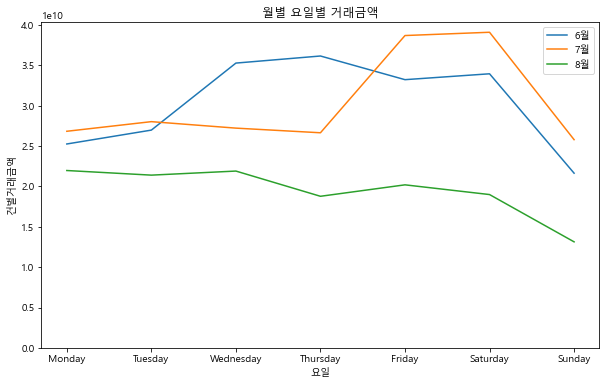

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(df_grouped['월'].unique()):
    data = df_grouped[df_grouped['월'] == month]
    ax.plot(data['요일'], data['건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('건별거래금액')
ax.set_title('월별 요일별 거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

In [29]:
population = pd.read_csv("busan_population.csv",encoding = 'cp949',low_memory =False)

In [30]:
population

,region,june,july,august
0,중구,42692,42594,42455
1,서구,106397,106818,107522
2,동구,90186,89944,89800
3,영도구,111307,111271,111100
4,부산진구,353674,354120,354367
5,동래구,275668,275956,275830
6,남구,265158,264557,264112
7,북구,282625,282381,282230
8,해운대구,396120,395601,394626
9,사하구,309199,308777,308286


In [78]:
ga = pd.read_csv("가맹점.csv",encoding = 'cp949',low_memory =False)
ga

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.075315,129.068770,2022-12-22
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.101239,128.990313,2022-12-22
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.193467,129.130557,2022-12-22
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.189890,129.071940,2022-12-22
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.150897,129.023928,2022-12-22
...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.083390,128.896842,2022-12-22
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.081755,128.985395,2022-12-22
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.109934,129.037028,2022-12-22
126939,126940,현혜반점,NaN,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22


In [79]:
ga['가맹점명'].nunique()

107548

In [80]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126941 entries, 0 to 126940
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   순번       126941 non-null  int64  
 1   가맹점명     126941 non-null  object 
 2   도로명      117361 non-null  object 
 3   지번       9580 non-null    object 
 4   위도       117361 non-null  float64
 5   경도       117361 non-null  float64
 6   데이터기준일자  126941 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.8+ MB


In [83]:
ga['도로명'] = ga['도로명'].astype(str)
def get_gu(x):
    tokens = x.split()
    if len(tokens) >= 2:
        return tokens[1]
    else:
        return None

ga['구'] = ga['도로명'].apply(get_gu)

In [84]:
ga

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,구
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,nan,35.075315,129.068770,2022-12-22,영도구
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",nan,35.101239,128.990313,2022-12-22,사하구
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),nan,35.193467,129.130557,2022-12-22,해운대구
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",nan,35.189890,129.071940,2022-12-22,연제구
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),nan,35.150897,129.023928,2022-12-22,부산진구
...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",nan,35.083390,128.896842,2022-12-22,강서구
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",nan,35.081755,128.985395,2022-12-22,사하구
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),nan,35.109934,129.037028,2022-12-22,중구
126939,126940,현혜반점,nan,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,None


In [85]:
ga['구2'] = ga['지번'].dropna().apply(get_gu)

In [86]:
def get_gu(x):
    tokens = x.split()
    if len(tokens) >= 3:
        return tokens[1]
    else:
        return None

ga['지번'] = ga['지번'].astype(str)
ga['구2'] = ga['지번'].apply(get_gu)

In [87]:
ga

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,구,구2
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,nan,35.075315,129.068770,2022-12-22,영도구,None
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",nan,35.101239,128.990313,2022-12-22,사하구,None
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),nan,35.193467,129.130557,2022-12-22,해운대구,None
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",nan,35.189890,129.071940,2022-12-22,연제구,None
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),nan,35.150897,129.023928,2022-12-22,부산진구,None
...,...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",nan,35.083390,128.896842,2022-12-22,강서구,None
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",nan,35.081755,128.985395,2022-12-22,사하구,None
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),nan,35.109934,129.037028,2022-12-22,중구,None
126939,126940,현혜반점,nan,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,None,사상구


In [101]:
ga['구_m'] = pd.concat([ga['구'].dropna(), ga['구2'].dropna()], axis=0).tolist()
ga

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,구,구2,구_m
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,nan,35.075315,129.068770,2022-12-22,영도구,None,영도구
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",nan,35.101239,128.990313,2022-12-22,사하구,None,사하구
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),nan,35.193467,129.130557,2022-12-22,해운대구,None,해운대구
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",nan,35.189890,129.071940,2022-12-22,연제구,None,연제구
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),nan,35.150897,129.023928,2022-12-22,부산진구,None,부산진구
...,...,...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",nan,35.083390,128.896842,2022-12-22,강서구,None,동구
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",nan,35.081755,128.985395,2022-12-22,사하구,None,부산진구
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),nan,35.109934,129.037028,2022-12-22,중구,None,금정구
126939,126940,현혜반점,nan,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,None,사상구,금정구


In [105]:
null_gu = ga[['구', '구2']].isnull().all(axis=1)
null_rows = ga[null_gu]
null_rows

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,구,구2,구_m


In [113]:
ga.loc[ga['구'].isna(), '구'] = ga.loc[ga['구'].isna(), '구2']
ga

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,구,구2,구_m
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,nan,35.075315,129.068770,2022-12-22,영도구,None,영도구
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",nan,35.101239,128.990313,2022-12-22,사하구,None,사하구
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),nan,35.193467,129.130557,2022-12-22,해운대구,None,해운대구
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",nan,35.189890,129.071940,2022-12-22,연제구,None,연제구
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),nan,35.150897,129.023928,2022-12-22,부산진구,None,부산진구
...,...,...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",nan,35.083390,128.896842,2022-12-22,강서구,None,동구
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",nan,35.081755,128.985395,2022-12-22,사하구,None,부산진구
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),nan,35.109934,129.037028,2022-12-22,중구,None,금정구
126939,126940,현혜반점,nan,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,사상구,사상구,금정구


In [ ]:
ga=ga.drop(['구_m'], axis=1)

In [116]:
ga

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,구,구2
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,nan,35.075315,129.068770,2022-12-22,영도구,None
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",nan,35.101239,128.990313,2022-12-22,사하구,None
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),nan,35.193467,129.130557,2022-12-22,해운대구,None
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",nan,35.189890,129.071940,2022-12-22,연제구,None
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),nan,35.150897,129.023928,2022-12-22,부산진구,None
...,...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",nan,35.083390,128.896842,2022-12-22,강서구,None
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",nan,35.081755,128.985395,2022-12-22,사하구,None
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),nan,35.109934,129.037028,2022-12-22,중구,None
126939,126940,현혜반점,nan,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,사상구,사상구


In [117]:
ga=ga.drop(['구2'], axis=1)

In [119]:
ga=ga.drop(['도로명'], axis=1)
ga=ga.drop(['지번'], axis=1)

In [121]:
ga

,순번,가맹점명,위도,경도,데이터기준일자,구
0,1,고봉민김밥인,35.075315,129.068770,2022-12-22,영도구
1,2,미사랑스킨앤바디,35.101239,128.990313,2022-12-22,사하구
2,3,피자스쿨 부산재송점,35.193467,129.130557,2022-12-22,해운대구
3,4,미스터피자아시아드2호점,35.189890,129.071940,2022-12-22,연제구
4,5,성원칼국수,35.150897,129.023928,2022-12-22,부산진구
...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,35.083390,128.896842,2022-12-22,강서구
126937,126938,행복홈케어,35.081755,128.985395,2022-12-22,사하구
126938,126939,현대표구사,35.109934,129.037028,2022-12-22,중구
126939,126940,현혜반점,NaN,NaN,2022-12-22,사상구


In [122]:
import datetime

# datetime 형식으로 변환하는 함수
def to_datetime(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

# 월 값을 추출하는 함수
def get_month(x):
    return x.month

# '데이터기준일자' 열에서 datetime 형식으로 변환한 후 월 값을 추출
ga['월'] = ga['데이터기준일자'].apply(to_datetime).apply(get_month)

In [124]:
ga['월'].unique()

array([12], dtype=int64)

In [128]:
ga['구'].value_counts()

부산진구    16031
해운대구    13122
동래구     10508
사하구      9564
금정구      8710
남구       8243
북구       8068
사상구      7999
수영구      7912
연제구      7538
기장군      6763
강서구      5772
중구       5134
동구       4991
서구       3333
영도구      3218
양산시        13
김해시         8
창원시         5
중랑구         1
단양군         1
달서구         1
은평구         1
경주시         1
의령군         1
밀양시         1
시흥시         1
함안군         1
Name: 구, dtype: int64

In [129]:
df['시군구명'].value_counts()

부산진구    3568478
해운대구    3075184
동래구     2504945
금정구     2151431
사하구     2004880
북구      1995619
연제구     1912035
남구      1881507
수영구     1595574
사상구     1489430
강서구     1336111
기장군      963681
동구       726391
서구       691523
중구       655690
영도구      582429
Name: 시군구명, dtype: int64

In [137]:
paysum = df.groupby(['중분류', '요일'])['건별거래금액'].agg(**{'건별거래금액':'sum'})
pd.set_option('display.float_format', '{:.2f}'.format)
paysum

건별거래금액
중분류 요일                      
교육  Monday    10106473753.68
    Tuesday   10806346810.48
    Wednesday 10949332899.05
    Thursday  11032680258.42
    Friday    11423447921.11
...                      ...
한식  Wednesday 15635682523.22
    Thursday  14516493462.45
    Friday    17537947928.15
    Saturday  21952948108.10
    Sunday    17990176893.33

[119 rows x 1 columns]

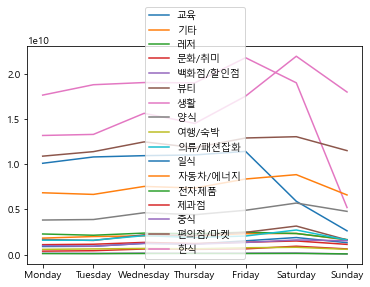

In [133]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = df.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 그래프 그리기
for category in grouped['중분류'].unique():
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category)

plt.legend()
plt.show()

#생활,한식,편의점

In [140]:
countsum = df.groupby(['중분류', '요일'])['거래건수'].agg(**{'거래건수':'sum'})
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)
countsum

거래건수
중분류     요일                
교육      Monday       72002
        Tuesday      75126
        Wednesday    78846
        Thursday     77585
        Friday       78422
        Saturday     53804
        Sunday       31237
기타      Monday       62682
        Tuesday      58852
        Wednesday    66508
        Thursday     64232
        Friday       72517
        Saturday     82390
        Sunday       67042
레저      Monday       91734
        Tuesday      87460
        Wednesday    99956
        Thursday     95040
        Friday      106348
        Saturday    127454
        Sunday      112756
문화/취미   Monday       16548
        Tuesday      16488
        Wednesday    21383
        Thursday     19125
        Friday       21104
        Saturday     28137
        Sunday       18510
백화점/할인점 Monday       12710
        Tuesday      12022
        Wednesday    13504
        Thursday     12609
        Friday       13162
        Saturday     12677
        Sunday        5663
뷰티      Monday       47148
        Tuesday      41225
        Wednesday    59996
        Thursday     56621
        Friday       64290
        Saturday     81315
        Sunday       45777
생활      Monday      857722
        Tuesday     862697
        Wednesday   876557
        Thursday    860601
        Friday      945613
        Saturday    791505
        Sunday      275855
양식      Monday      601140
        Tuesday     619604
        Wednesday   720628
        Thursday    693201
        Friday      734578
        Saturday    741834
        Sunday      604048
여행/숙박   Monday       73583
        Tuesday      81819
        Wednesday    85651
        Thursday     81355
        Friday       94997
        Saturday     91900
        Sunday       63458
의류/패션잡화 Monday       49317
        Tuesday      49526
        Wednesday    59692
        Thursday     56589
        Friday       59090
        Saturday     67423
        Sunday       43209
일식      Monday       25310
        Tuesday      26378
        Wednesday    33862
        Thursday     32245
        Friday       38755
        Saturday     41182
        Sunday       30977
자동차/에너지 Monday      146173
        Tuesday     142119
        Wednesday   161963
        Thursday    156887
        Friday      175907
        Saturday    188315
        Sunday      151208
전자제품    Monday        2362
        Tuesday       2342
        Wednesday     2497
        Thursday      2528
        Friday        2372
        Saturday      2146
        Sunday        1294
제과점     Monday      124477
        Tuesday     128670
        Wednesday   149704
        Thursday    134135
        Friday      143674
        Saturday    145162
        Sunday      110608
중식      Monday       45179
        Tuesday      43320
        Wednesday    57372
        Thursday     53794
        Friday       58062
        Saturday     61236
        Sunday       57813
편의점/마켓  Monday     1306365
        Tuesday    1348105
        Wednesday  1482313
        Thursday   1413064
        Friday     1475859
        Saturday   1407588
        Sunday     1234862
한식      Monday      524548
        Tuesday     547059
        Wednesday   623142
        Thursday    586131
        Friday      652415
        Saturday    675032
        Sunday      544920

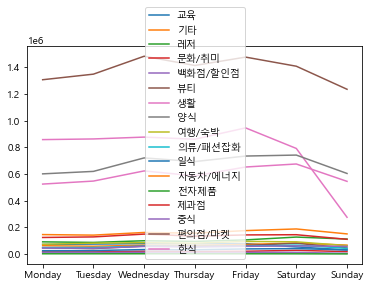

In [138]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = df.groupby(['중분류', '요일'])['거래건수'].sum().reset_index()

# 그래프 그리기
for category in grouped['중분류'].unique():
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['거래건수'], label=category)

plt.legend()
plt.show()

#편의점/마켓, 생활, 뷰티?,한식 순

In [141]:
s_grouped = df.groupby('중분류')
store_visit = s_grouped['거래건수'].agg(**{'업종별방문수':'sum'})
store_visit

,업종별방문수
중분류,
교육,467022
기타,474223
레저,720748
문화/취미,141295
백화점/할인점,82347
뷰티,396372
생활,5470550
양식,4715033
여행/숙박,572763


In [142]:
store_visit.sort_values(by = ['업종별방문수'], ascending = False).head(10)

,업종별방문수
중분류,
편의점/마켓,9668156
생활,5470550
양식,4715033
한식,4153247
자동차/에너지,1122572
제과점,936430
레저,720748
여행/숙박,572763
기타,474223


In [146]:
store_mean = s_grouped['총거래금액'].agg(**{'업종별총거래금액':'mean'})
store_mean.sort_values(by = ['업종별총거래금액'], ascending = False).head(10)
#교육, 전자제품, 자동차/에너지 순 

,업종별총거래금액
중분류,
교육,151309.86
전자제품,63620.47
자동차/에너지,49280.08
일식,41192.24
의류/패션잡화,39298.06
뷰티,39258.97
한식,34346.62
기타,33865.17
문화/취미,32920.40


In [149]:
paysum = df.groupby(['중분류'])['건별거래금액'].agg(**{'건별거래금액':'mean'})
pd.set_option('display.float_format', '{:.2f}'.format)
paysum

#교육, 기타. 레저 순

,건별거래금액
중분류,
교육,144288.22
기타,32225.89
레저,25042.80
문화/취미,31566.66
백화점/할인점,12937.22
뷰티,38222.36
생활,23877.28
양식,7936.49
여행/숙박,8226.08


In [157]:
time_store = df.groupby(['기준시간대값', '중분류'])['거래건수'].agg(**{'거래시간별거래건수':'sum'})
top5 = time_store.sort_values(ascending=False,by='중분류').head(5)
top5

,,거래시간별거래건수
기준시간대값,중분류,
23,한식,55684
18,한식,421255
10,한식,66635
1,한식,17573
7,한식,13623


In [158]:
time_store_top5 = time_store.groupby('기준시간대값').apply(lambda x: x.sort_values(by='거래시간별거래건수', ascending=False).head(5))

In [159]:
time_store_top5

거래시간별거래건수
기준시간대값 기준시간대값 중분류               
0      0      편의점/마켓      140750
              한식           28978
              여행/숙박        22607
              레저           18601
              생활           15044
1      1      편의점/마켓       83280
              한식           17573
              여행/숙박        15999
              레저           12702
              생활            7568
2      2      편의점/마켓       54703
              여행/숙박        10731
              한식           10092
              레저            8699
              생활            4560
3      3      편의점/마켓       37642
              여행/숙박         6904
              한식            6149
              레저            5528
              생활            2612
4      4      편의점/마켓       34125
              여행/숙박         6972
              한식            4360
              레저            3658
              자동차/에너지       2502
5      5      편의점/마켓       55981
              자동차/에너지      10597
              여행/숙박         8017
              한식            3883
              생활            2977
6      6      편의점/마켓      118707
              자동차/에너지      27893
              여행/숙박        11139
              생활            8140
              한식            6634
7      7      편의점/마켓      213805
              양식           52375
              자동차/에너지      44993
              여행/숙박        20645
              생활           16793
8      8      편의점/마켓      343555
              양식          282954
              자동차/에너지      57209
              생활           54126
              여행/숙박        41057
9      9      생활          347034
              편의점/마켓      337585
              양식          291814
              자동차/에너지      65828
              제과점          41874
10     10     생활          534080
              편의점/마켓      378898
              양식          280563
              자동차/에너지      71092
              한식           66635
11     11     생활          585295
              편의점/마켓      488688
              양식          316295
              한식          270061
              자동차/에너지      72193
12     12     한식          689260
              편의점/마켓      668353
              양식          627580
              생활          497587
              제과점          79773
13     13     편의점/마켓      550192
              양식          514464
              한식          501797
              생활          289674
              자동차/에너지      73371
14     14     편의점/마켓      494798
              생활          467523
              양식          412945
              한식          268101
              자동차/에너지      74962
15     15     편의점/마켓      551980
              생활          551870
              양식          357973
              한식          158298
              자동차/에너지      77144
16     16     편의점/마켓      651565
              생활          596970
              양식          298232
              한식          148341
              자동차/에너지      83601
17     17     편의점/마켓      780991
              생활          569181
              양식          262925
              한식          243454
              자동차/에너지      89054
18     18     편의점/마켓      929455
              한식          421255
              생활          405289
              양식          282928
              자동차/에너지      89250
19     19     편의점/마켓      792828
              한식          501391
              양식          278538
              생활          221330
              제과점          70105
20     20     편의점/마켓      678303
              한식          377428
              양식          229985
              생활          130756
              제과점          61215
21     21     편의점/마켓      588603
              한식          195272
              양식          134035
              생활           81092
              레저           49531
22     22     편의점/마켓      435446
              한식          100154
              양식           51299
              생활           49377
              레저           39677
23     23     편의점/마켓      257923
              한식           55684
              생활           29658
              레저           27874
              여행/숙박        245

In [160]:
time_store = df.groupby(['기준시간대값', '중분류'])['거래건수'].agg(**{'거래시간별업종방문수':'sum'})
time_store

거래시간별업종방문수
기준시간대값 중분류                
0      교육              288
       기타            11697
       레저            18601
       문화/취미           252
       백화점/할인점           1
       뷰티               33
       생활            15044
       양식             8432
       여행/숙박         22607
       의류/패션잡화         230
       일식             2106
       자동차/에너지        4316
       전자제품            149
       제과점             324
       중식              837
       편의점/마켓       140750
       한식            28978
1      교육               94
       기타             6642
       레저            12702
       문화/취미           131
       뷰티               12
       생활             7568
       양식             3977
       여행/숙박         15999
       의류/패션잡화         168
       일식             1035
       자동차/에너지        2591
       전자제품             77
       제과점              88
       중식              500
       편의점/마켓        83280
       한식            17573
2      교육               63
       기타             3127
       레저             8699
       문화/취미            89
       뷰티                8
       생활             4560
       양식             1888
       여행/숙박         10731
       의류/패션잡화          68
       일식              381
       자동차/에너지        1805
       전자제품             80
       제과점              31
       중식              270
       편의점/마켓        54703
       한식            10092
3      교육               57
       기타             1421
       레저             5528
       문화/취미            50
       뷰티                5
       생활             2612
       양식             1010
       여행/숙박          6904
       의류/패션잡화          32
       일식              148
       자동차/에너지        1456
       전자제품             20
       제과점              27
       중식              139
       편의점/마켓        37642
       한식             6149
4      교육               87
       기타             1008
       레저             3658
       문화/취미            23
       뷰티                2
       생활             2014
       양식              532
       여행/숙박          6972
       의류/패션잡화          21
       일식               57
       자동차/에너지        2502
       전자제품             19
       제과점              11
       중식               83
       편의점/마켓        34125
       한식             4360
5      교육              146
       기타             2900
       레저             2912
       문화/취미            21
       뷰티                5
       생활             2977
       양식              568
       여행/숙박          8017
       의류/패션잡화         155
       일식               17
       자동차/에너지       10597
       전자제품              5
       제과점              42
       중식               40
       편의점/마켓        55981
       한식             3883
6      교육              194
       기타             4619
       레저             3166
       문화/취미            29
       뷰티               19
       생활             8140
       양식             3410
       여행/숙박         11139
       의류/패션잡화         252
       일식               13
       자동차/에너지       27893
       전자제품             24
       제과점             870
       중식               12
       편의점/마켓       118707
       한식             6634
7      교육             1168
       기타             5950
       레저             3946
       문화/취미           109
       백화점/할인점          20
       뷰티               47
       생활            16793
       양식            52375
       여행/숙박         20645
       의류/패션잡화         712
       일식               13
       자동차/에너지       44993
       전자제품             91
       제과점           11472
       중식               32
       편의점/마켓       213805
       한식            13623
8      교육             3090
       기타             9608
       레저             6877
       문화/취미          1023
       백화점/할인점         496
       뷰티              221
       생활            54126
       양식           282954
       여행/숙박         41057
       의류/패션잡화        2059
       일식               39
       자동차/에너지       57209
       전자제품            293
       제과점           34998
       중식              121
       편의점/마켓       343555
       한식           

In [162]:
df.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액,월
0,2022-06-01,0,중구,대청동,코나,M,1,7350,편의점/마켓,50,Wednesday,7350.00,6
1,2022-06-01,0,중구,중앙동,부산,F,1,3700,편의점/마켓,40,Wednesday,3700.00,6
2,2022-06-01,0,중구,중앙동,부산,M,1,7500,편의점/마켓,30,Wednesday,7500.00,6
3,2022-06-01,0,중구,중앙동,부산,M,1,2700,편의점/마켓,20,Wednesday,2700.00,6
4,2022-06-01,0,중구,중앙동,코나,M,1,13900,편의점/마켓,40,Wednesday,13900.00,6


In [167]:
df.tail()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액,월
27134903,2022-08-01,0,영도구,동삼1동,코나,M,1,30000,편의점/마켓,60,Monday,30000.00,8
27134904,2022-08-01,0,영도구,동삼1동,코나,M,1,59600,기타,20,Monday,59600.00,8
27134905,2022-08-01,0,영도구,동삼1동,코나,F,1,7500,생활,20,Monday,7500.00,8
27134906,2022-08-01,0,영도구,동삼1동,하나,F,2,7600,편의점/마켓,50,Monday,3800.00,8
27134907,2022-08-01,0,영도구,동삼1동,하나,M,1,2200,편의점/마켓,20,Monday,2200.00,8


In [166]:
df[['시군구명', '행정동명', '카드사명', '성별코드', 'age_range']].duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [165]:
df[['시군구명', '행정동명', '카드사명', '성별코드', 'age_range']].duplicated().sum()

27117188

In [171]:
#count_df = df.groupby(['월','기준시간대값', '중분류'])['거래건수'].agg(**{'거래시간별업종방문수':'sum'})
#count_df

In [177]:
df.to_csv("df_0409.csv", index = False)
ga.to_csv("ga_0409.csv", index = False)

In [5]:
# 데이터 불러오기
df= pd.read_csv("df_0409.csv")
ga= pd.read_csv("ga_0409.csv")

In [6]:
df2 = df.sample(frac=0.1, random_state=1)

In [7]:
df2.tail()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액,월
776516,2022-06-03,10,동구,범일2동,하나,M,1,2500,양식,30,Friday,2500.0,6
13173875,2022-07-10,14,해운대구,우1동,하나,M,1,27900,편의점/마켓,40,Sunday,27900.0,7
10414140,2022-07-02,8,기장군,기장읍,부산,F,1,2500,양식,20,Saturday,2500.0,7
12498503,2022-07-08,15,남구,용호2동,코나,F,1,27500,생활,40,Friday,27500.0,7
1945824,2022-06-06,15,사상구,괘법동,코나,F,1,1400,편의점/마켓,30,Monday,1400.0,6


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713491 entries, 19728203 to 1945824
Data columns (total 13 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준일자       object 
 1   기준시간대값     int64  
 2   시군구명       object 
 3   행정동명       object 
 4   카드사명       object 
 5   성별코드       object 
 6   거래건수       int64  
 7   총거래금액      int64  
 8   중분류        object 
 9   age_range  int64  
 10  요일         object 
 11  건별거래금액     float64
 12  월          int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 289.8+ MB


In [13]:
df2.count()

기준일자         2713491
기준시간대값       2713491
시군구명         2713491
행정동명         2713491
카드사명         2713491
성별코드         2713491
거래건수         2713491
총거래금액        2713491
중분류          2713491
age_range    2713491
요일           2713491
건별거래금액       2713491
월            2713491
dtype: int64

C:\Users\samsung\AppData\Local\Temp\ipykernel_21928\4264782133.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  statistics = grouped_data.mean()
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


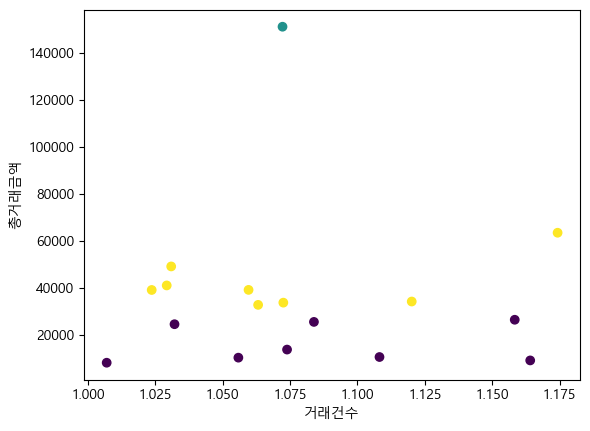

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. 중분류를 기준으로 그룹화
grouped_data = df.groupby('중분류')

# 3. 각 그룹별로 통계 계산
statistics = grouped_data.mean()

# 4. 군집화
kmeans = KMeans(n_clusters=3).fit(statistics)

# 5. 시각화
plt.scatter(statistics['거래건수'], statistics['총거래금액'], c=kmeans.labels_)
plt.xlabel('거래건수')
plt.ylabel('총거래금액')
plt.show()

In [15]:
df2

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액,월
19728203,2022-07-31,17,중구,광복동,코나,M,1,1000,편의점/마켓,50,Sunday,1000.0,7
9333680,2022-06-28,12,기장군,기장읍,코나,F,1,19000,편의점/마켓,40,Tuesday,19000.0,6
20452468,2022-08-03,12,해운대구,좌2동,하나,M,1,9500,양식,50,Wednesday,9500.0,8
24323147,2022-08-17,20,연제구,거제1동,하나,M,1,9000,편의점/마켓,50,Wednesday,9000.0,8
7208446,2022-06-21,12,부산진구,당감1동,코나,F,1,4000,양식,30,Tuesday,4000.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776516,2022-06-03,10,동구,범일2동,하나,M,1,2500,양식,30,Friday,2500.0,6
13173875,2022-07-10,14,해운대구,우1동,하나,M,1,27900,편의점/마켓,40,Sunday,27900.0,7
10414140,2022-07-02,8,기장군,기장읍,부산,F,1,2500,양식,20,Saturday,2500.0,7
12498503,2022-07-08,15,남구,용호2동,코나,F,1,27500,생활,40,Friday,27500.0,7


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. 전처리: 범주형 변수를 더미변수로 변환
df2 = pd.get_dummies(df2)
df2

,기준시간대값,거래건수,총거래금액,age_range,건별거래금액,월,기준일자_2022-06-01,기준일자_2022-06-02,기준일자_2022-06-03,기준일자_2022-06-04,...,중분류_중식,중분류_편의점/마켓,중분류_한식,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
19728203,17,1,1000,50,1000.0,7,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9333680,12,1,19000,40,19000.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
20452468,12,1,9500,50,9500.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24323147,20,1,9000,50,9000.0,8,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7208446,12,1,4000,30,4000.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776516,10,1,2500,30,2500.0,6,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
13173875,14,1,27900,40,27900.0,7,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10414140,8,1,2500,20,2500.0,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12498503,15,1,27500,40,27500.0,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df3=df.drop(['기준일자','행정동명'], axis=1)
df3

,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,중분류,age_range,요일,건별거래금액,월
0,0,중구,코나,M,1,7350,편의점/마켓,50,Wednesday,7350.0,6
1,0,중구,부산,F,1,3700,편의점/마켓,40,Wednesday,3700.0,6
2,0,중구,부산,M,1,7500,편의점/마켓,30,Wednesday,7500.0,6
3,0,중구,부산,M,1,2700,편의점/마켓,20,Wednesday,2700.0,6
4,0,중구,코나,M,1,13900,편의점/마켓,40,Wednesday,13900.0,6
...,...,...,...,...,...,...,...,...,...,...,...
27134903,0,영도구,코나,M,1,30000,편의점/마켓,60,Monday,30000.0,8
27134904,0,영도구,코나,M,1,59600,기타,20,Monday,59600.0,8
27134905,0,영도구,코나,F,1,7500,생활,20,Monday,7500.0,8
27134906,0,영도구,하나,F,2,7600,편의점/마켓,50,Monday,3800.0,8


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. 전처리: 범주형 변수를 더미변수로 변환
df3 = pd.get_dummies(df3)
df3

,기준시간대값,거래건수,총거래금액,age_range,건별거래금액,월,시군구명_강서구,시군구명_금정구,시군구명_기장군,시군구명_남구,...,중분류_중식,중분류_편의점/마켓,중분류_한식,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
0,0,1,7350,50,7350.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,3700,40,3700.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,7500,30,7500.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,2700,20,2700.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,13900,40,13900.0,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27134903,0,1,30000,60,30000.0,8,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
27134904,0,1,59600,20,59600.0,8,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27134905,0,1,7500,20,7500.0,8,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27134906,0,2,7600,50,3800.0,8,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [27]:
clus_data = df3.sample(frac=0.1, random_state=1)
clus_data

,기준시간대값,거래건수,총거래금액,age_range,건별거래금액,월,시군구명_강서구,시군구명_금정구,시군구명_기장군,시군구명_남구,...,중분류_중식,중분류_편의점/마켓,중분류_한식,요일_Friday,요일_Monday,요일_Saturday,요일_Sunday,요일_Thursday,요일_Tuesday,요일_Wednesday
19728203,17,1,1000,50,1000.0,7,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9333680,12,1,19000,40,19000.0,6,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
20452468,12,1,9500,50,9500.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24323147,20,1,9000,50,9000.0,8,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7208446,12,1,4000,30,4000.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776516,10,1,2500,30,2500.0,6,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13173875,14,1,27900,40,27900.0,7,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10414140,8,1,2500,20,2500.0,7,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
12498503,15,1,27500,40,27500.0,7,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
